## DS7333 Case Study 7

#### John Girard, Shijo Joseph,  Douglas Yip

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import statistics

import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, \
precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [2]:
# Load Data
df = pd.read_csv("final_project.csv")
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,...,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858,1
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,...,12.803189,0.841446,-0.682177,-5.047677,-0.017898,0.780130,6.387266,-1.374742,-1.623952,0
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,...,-0.346570,-0.144098,0.738298,7.241041,0.215347,-12.155249,3.265263,1.230963,3.335471,1
159998,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,7.805271,-10.233054,2.609986,4.251127,...,-0.307656,-0.601145,-3.443112,0.549931,0.206728,5.081980,1.701462,-0.279619,-1.986424,0


In [3]:
# Data Types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

#### EDA

In [4]:
# Check all NA values
df.isna().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [5]:
#Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,159974.0,-0.001028,0.371137,-1.592635,-0.251641,-0.002047,0.248532,1.600849
x1,159975.0,0.001358,6.340632,-26.278302,-4.260973,0.004813,4.284220,27.988178
x2,159962.0,-1.150145,13.273480,-59.394048,-10.166536,-1.340932,7.871676,63.545653
x3,159963.0,-0.024637,8.065032,-35.476594,-5.454438,-0.031408,5.445179,38.906025
x4,159974.0,-0.000549,6.382293,-28.467536,-4.313118,0.000857,4.306660,26.247812
x5,159963.0,0.013582,7.670076,-33.822988,-5.148130,0.014118,5.190749,35.550110
x6,159974.0,-1.670670,19.298665,-86.354483,-14.780146,-1.948594,11.446931,92.390605
x7,159973.0,-7.692795,30.542264,-181.506976,-27.324771,-6.956789,12.217071,149.150634
x8,159979.0,-0.030540,8.901185,-37.691045,-6.031058,-0.016840,5.972349,39.049831
x9,159970.0,0.005462,6.355040,-27.980659,-4.260619,0.006045,4.305734,27.377842


In [6]:
#Check x24 unique values
df['x24'].unique()

array(['euorpe', 'asia', 'america', nan], dtype=object)

In [7]:
df['x29'].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

In [8]:
df['x30'].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan],
      dtype=object)

In [9]:
# Fill object columns with mode

df['x24'].fillna('None', inplace=True)
df['x29'].fillna('None', inplace=True)
df['x30'].fillna('None', inplace=True)


In [10]:
df['x32'].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [11]:
df['x37'].unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [12]:
# Fill x32 NA with Mode. Get rig of percent sign and convert to float.
df['x32'].fillna("0.0%", inplace=True)

df['x32'] = df['x32'].str.rstrip("%").astype(float)/100

In [13]:
df['x32'].unique()

array([ 0.    , -0.0002, -0.0001,  0.0001, -0.0003,  0.0002, -0.0004,
        0.0003,  0.0004, -0.0005,  0.0005])

In [14]:
# Fill x37 NA with Mode. Get rig of percent sign and convert to float.
df['x37'].fillna("$0.00", inplace=True)

df['x37'] = df['x37'].str.lstrip("$").astype(float)

In [15]:
df['x37'].unique()

array([ 1313.96,  1962.78,   430.47, ...,  1588.65,   439.21, -1229.34])

In [20]:
#Replace remaining NAs with column mean

df=df.fillna(df.mean())

C:\Users\shijo\AppData\Local\Temp\ipykernel_17760\2789899860.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [21]:
df['x24'] = df['x24'].astype('category')
df['x29'] = df['x29'].astype('category')
df['x30'] = df['x30'].astype('category')
df['y'] = df['y'].astype('category')

In [22]:
# Data Types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   x0      160000 non-null  float64 
 1   x1      160000 non-null  float64 
 2   x2      160000 non-null  float64 
 3   x3      160000 non-null  float64 
 4   x4      160000 non-null  float64 
 5   x5      160000 non-null  float64 
 6   x6      160000 non-null  float64 
 7   x7      160000 non-null  float64 
 8   x8      160000 non-null  float64 
 9   x9      160000 non-null  float64 
 10  x10     160000 non-null  float64 
 11  x11     160000 non-null  float64 
 12  x12     160000 non-null  float64 
 13  x13     160000 non-null  float64 
 14  x14     160000 non-null  float64 
 15  x15     160000 non-null  float64 
 16  x16     160000 non-null  float64 
 17  x17     160000 non-null  float64 
 18  x18     160000 non-null  float64 
 19  x19     160000 non-null  float64 
 20  x20     160000 non-null  f

In [23]:
# Check all NA values
df.isna().sum()

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
y      0
dtype: int64

In [24]:
#Check summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x0,160000.0,-1.027912e-03,0.371107,-1.592635,-0.251574,-0.001980,0.248505,1.600849
x1,160000.0,1.358313e-03,6.340137,-26.278302,-4.260377,0.004056,4.282958,27.988178
x2,160000.0,-1.150145e+00,13.271904,-59.394048,-10.163721,-1.336542,7.868661,63.545653
x3,160000.0,-2.463730e-02,8.064099,-35.476594,-5.452183,-0.028386,5.443760,38.906025
x4,160000.0,-5.490000e-04,6.381775,-28.467536,-4.312029,-0.000105,4.305730,26.247812
x5,160000.0,1.358155e-02,7.669189,-33.822988,-5.147177,0.013582,5.188709,35.550110
x6,160000.0,-1.670670e+00,19.297096,-86.354483,-14.777287,-1.943830,11.444045,92.390605
x7,160000.0,-7.692795e+00,30.539687,-181.506976,-27.318385,-6.961396,12.213263,149.150634
x8,160000.0,-3.054029e-02,8.900601,-37.691045,-6.030219,-0.018784,5.971778,39.049831
x9,160000.0,5.462094e-03,6.354444,-27.980659,-4.259907,0.005462,4.305071,27.377842


In [25]:
df['y'].dtype == 'category'

True

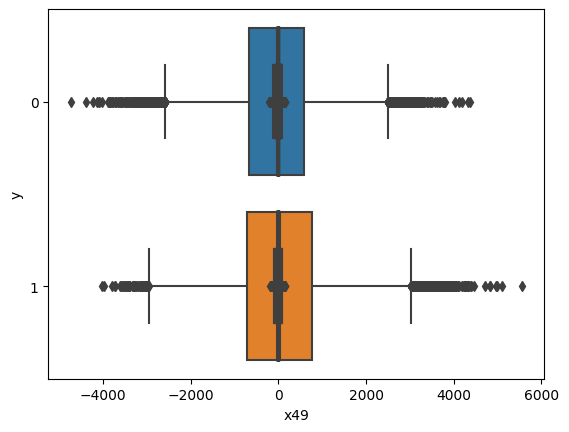

In [26]:
for i in df:
    if(df[i].dtype != 'category'):
        sns.boxplot(data=df, x=i, y='y')

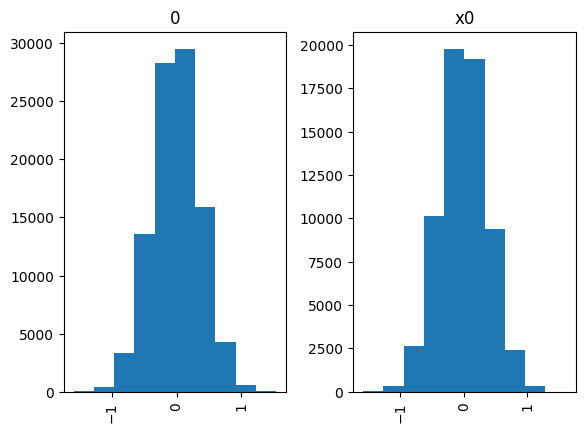

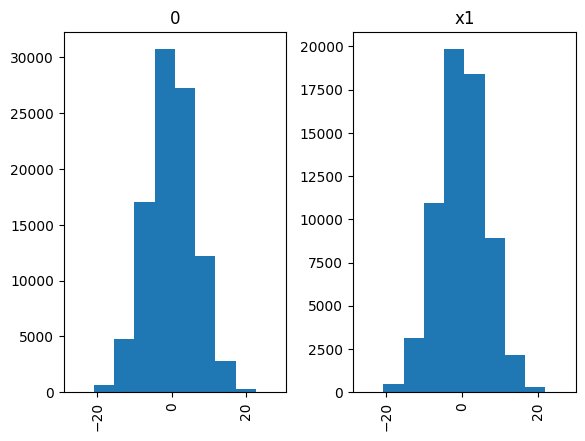

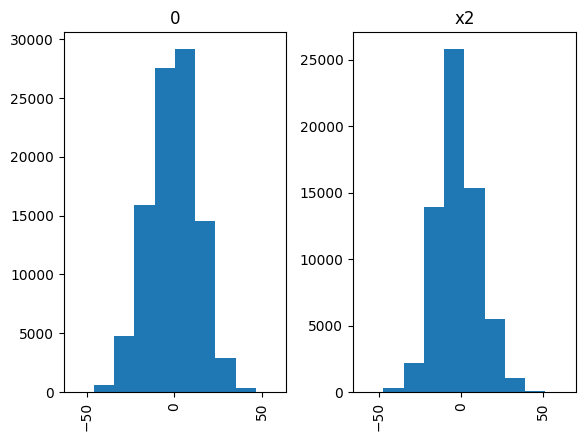

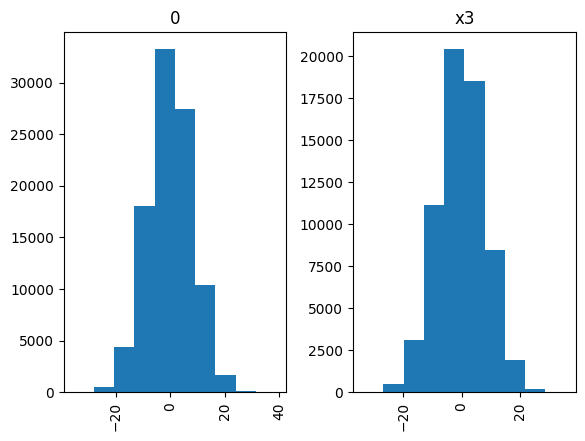

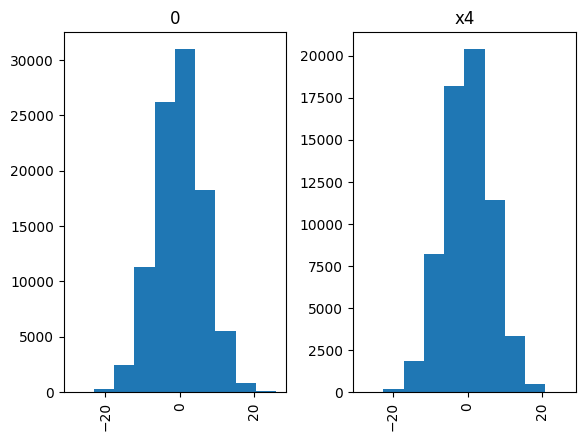

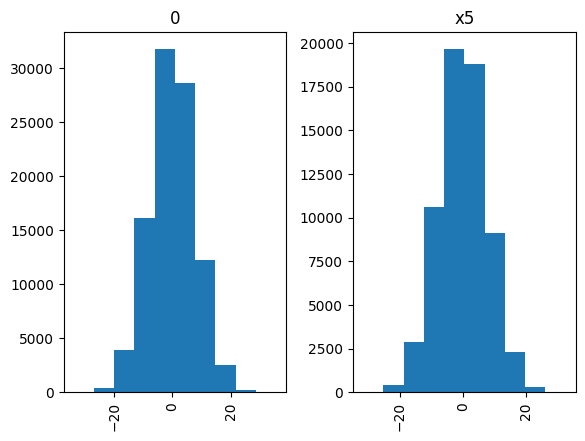

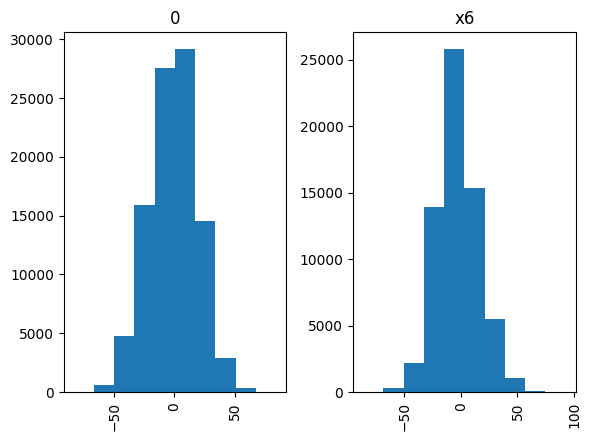

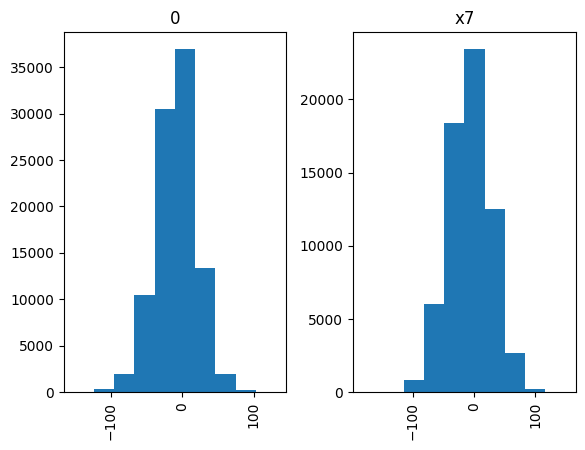

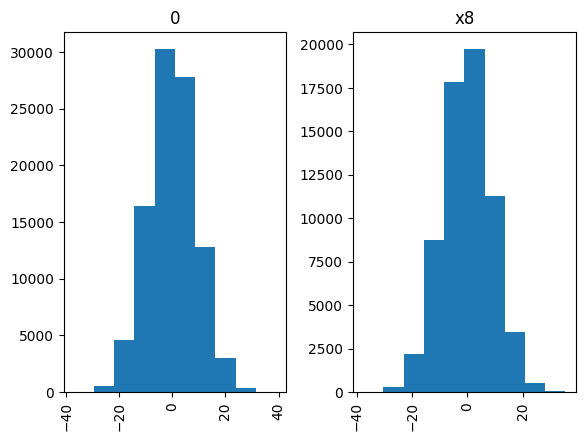

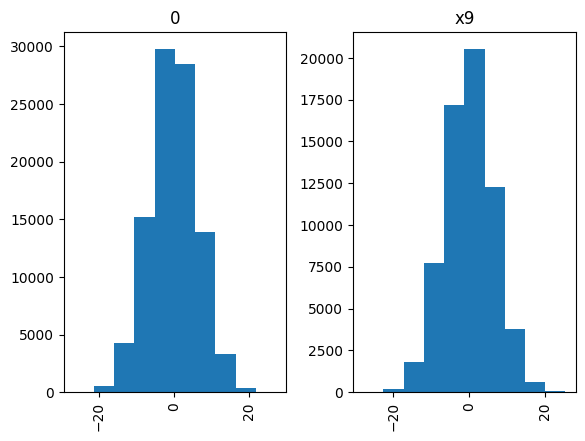

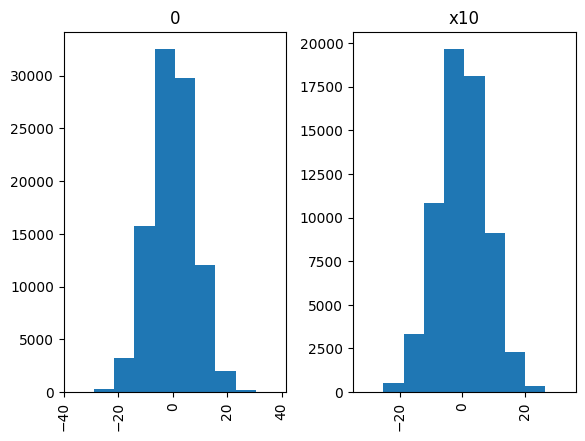

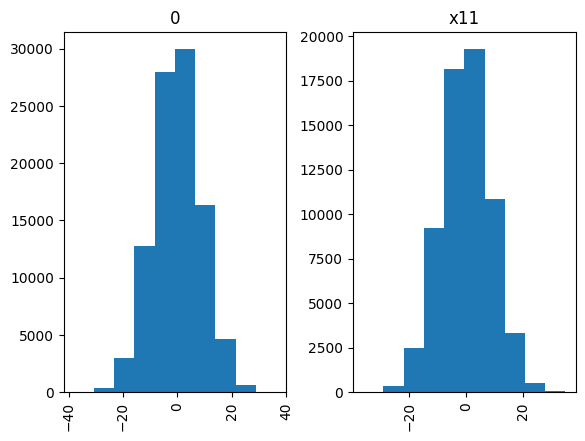

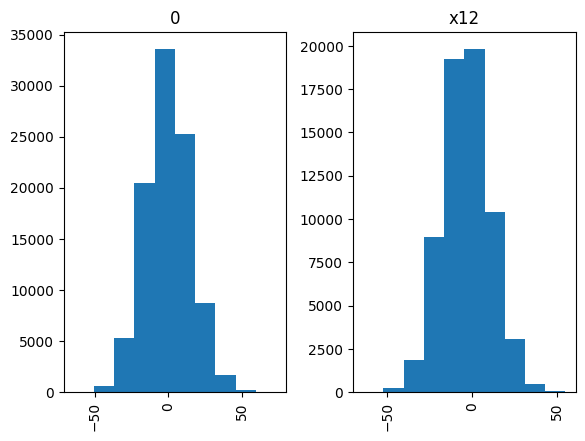

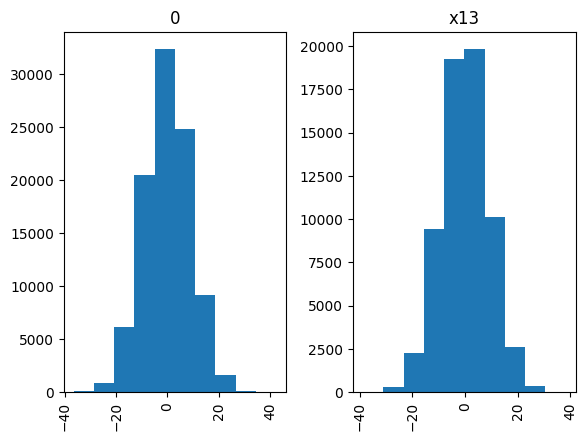

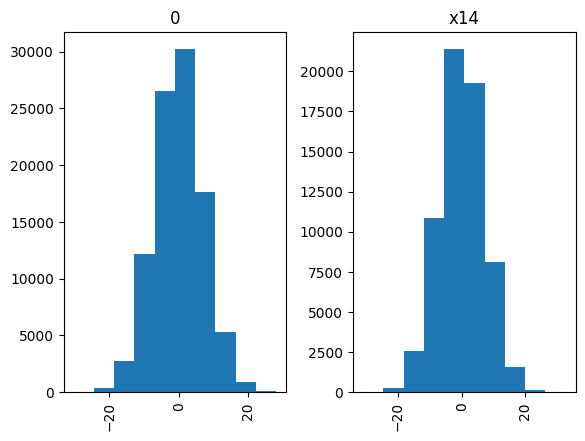

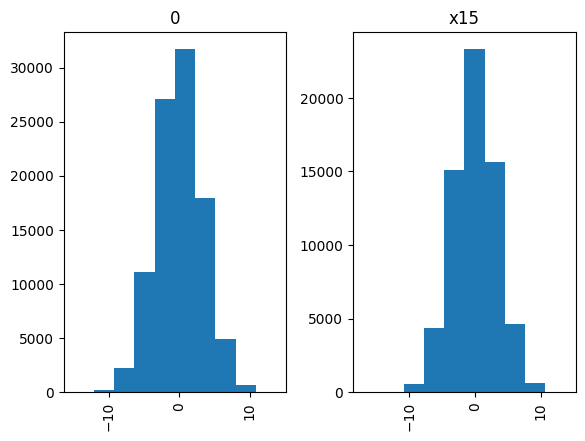

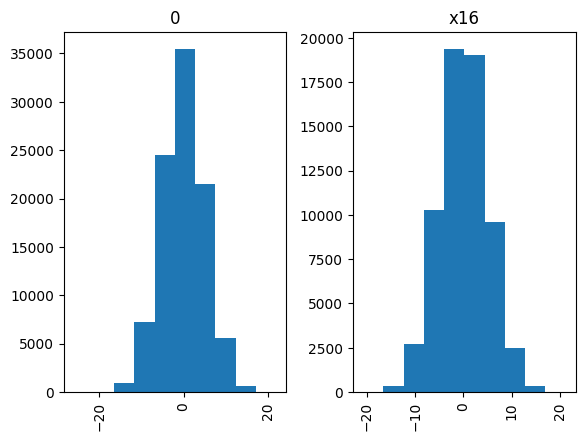

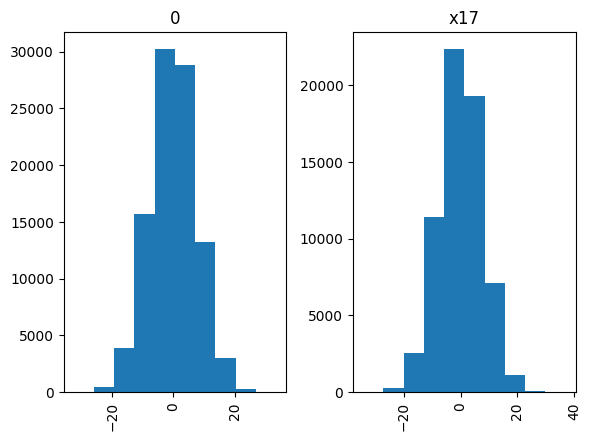

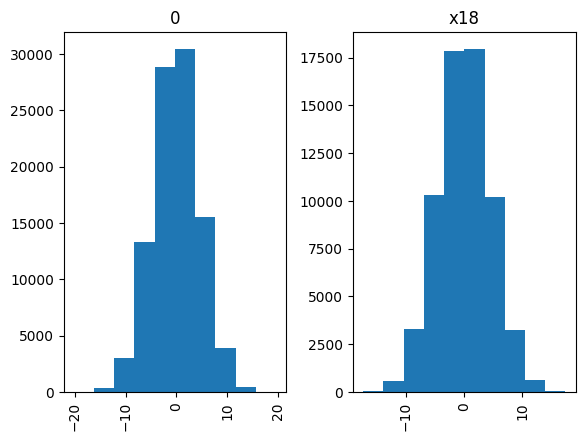

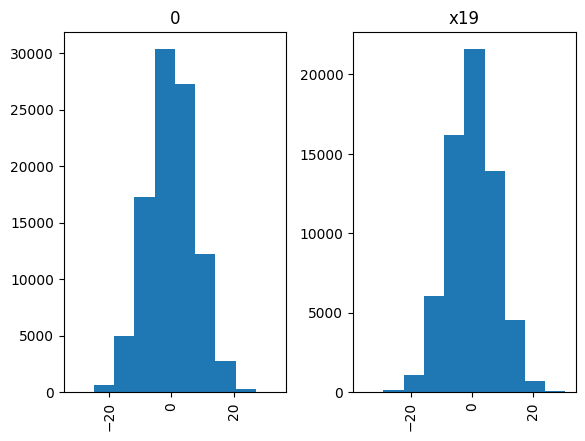

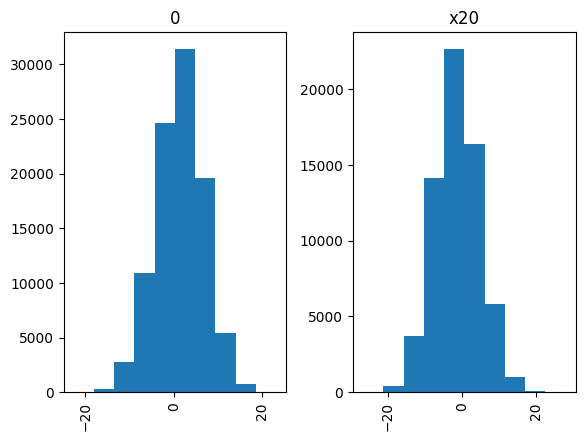

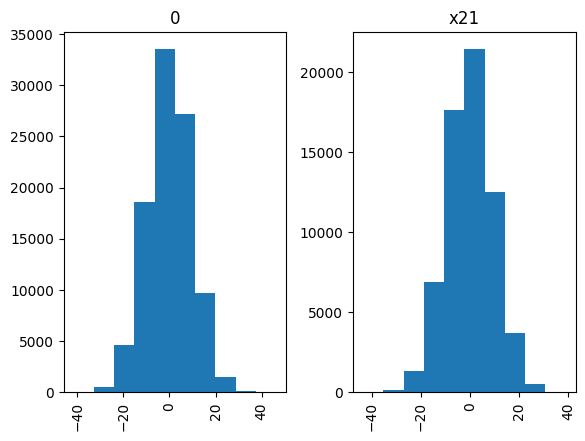

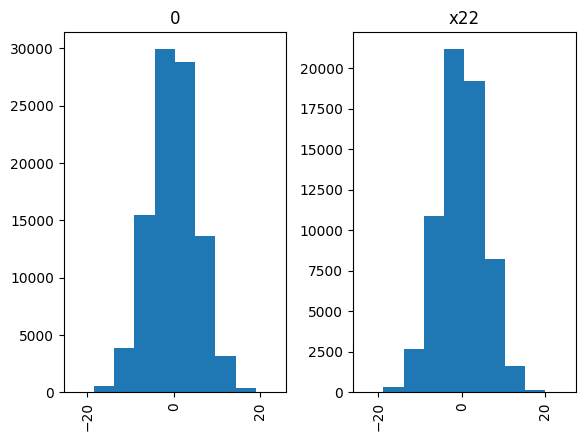

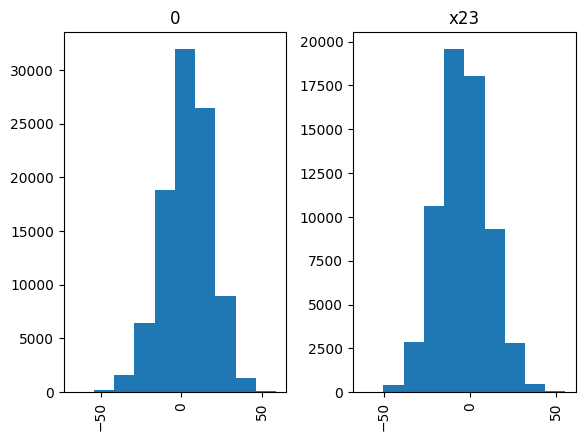

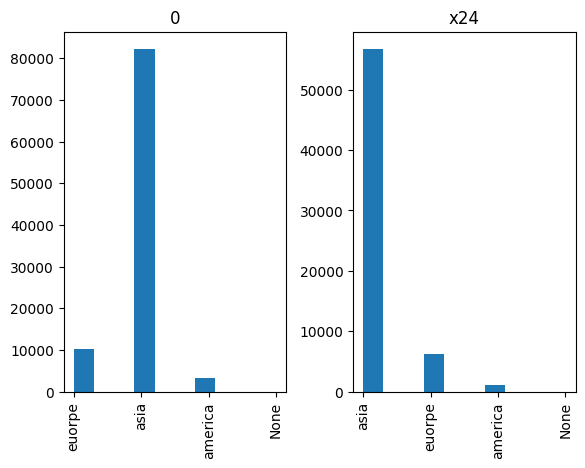

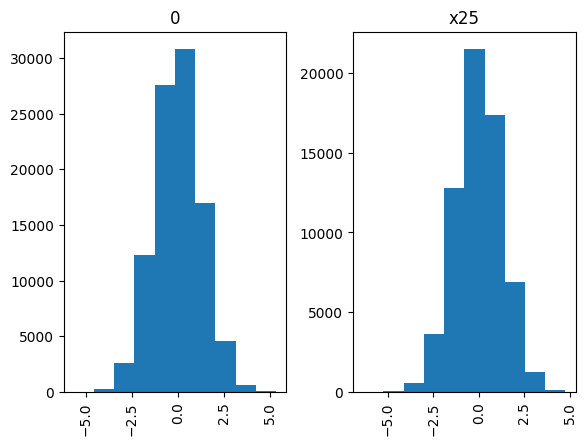

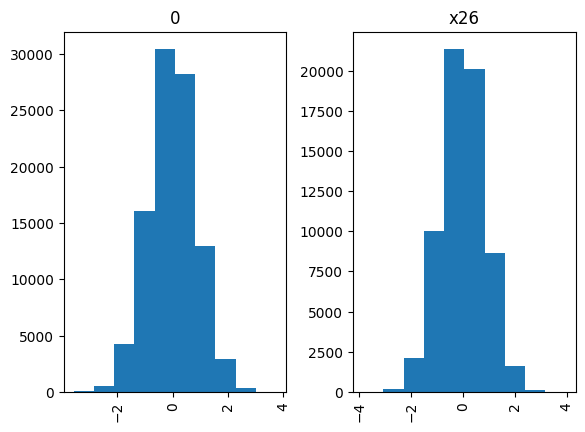

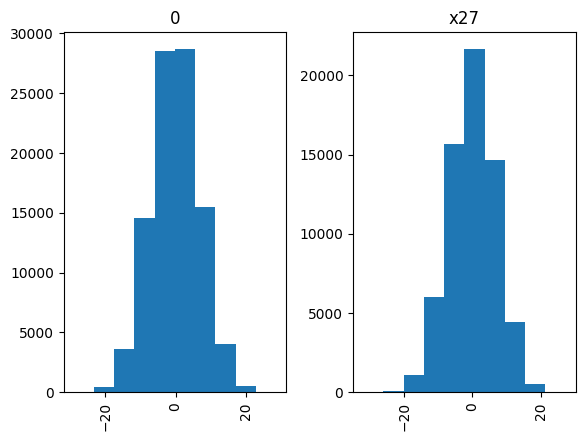

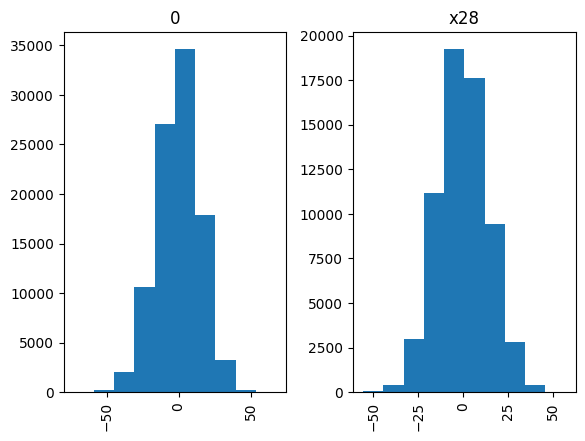

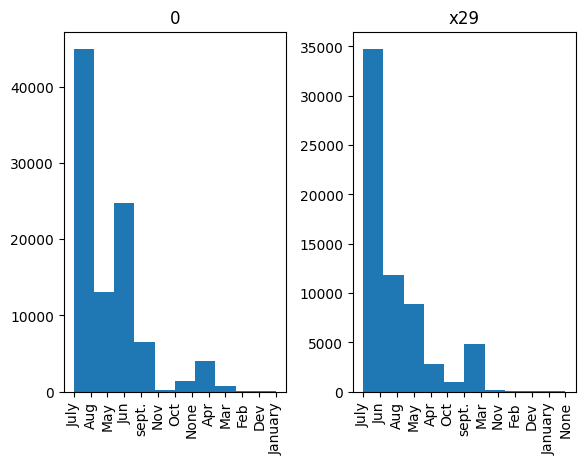

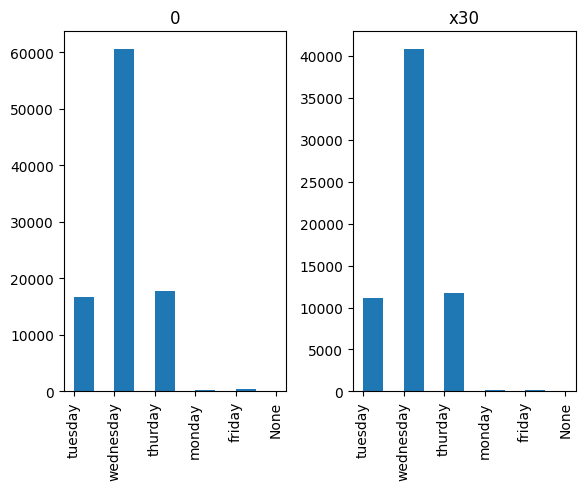

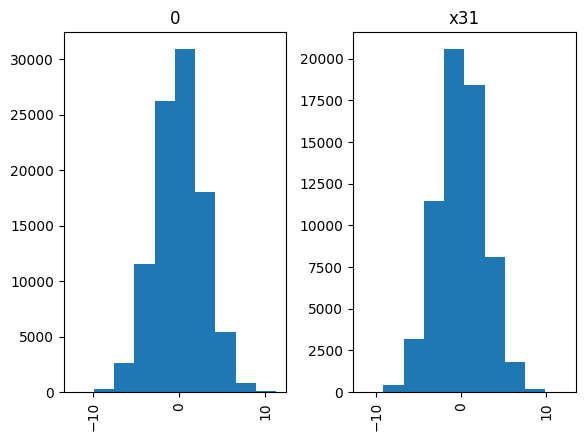

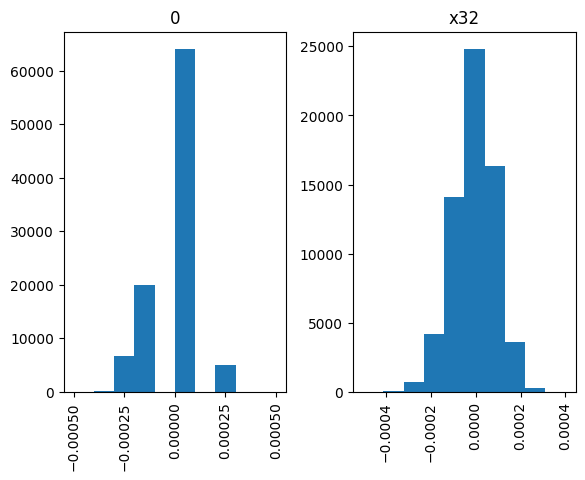

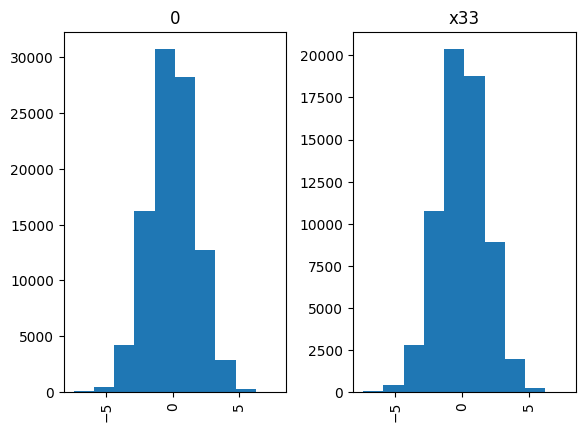

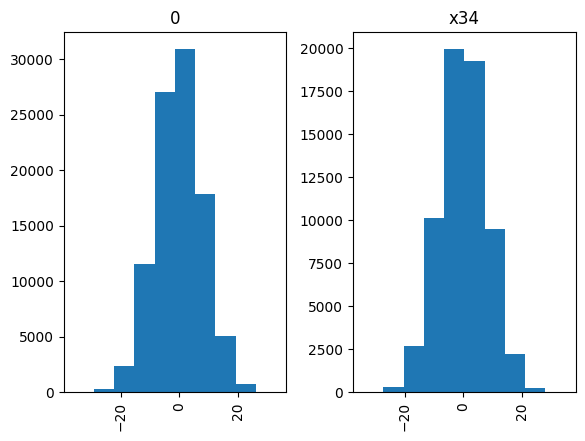

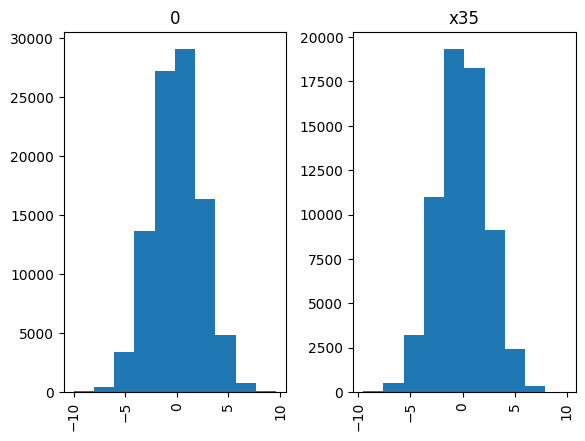

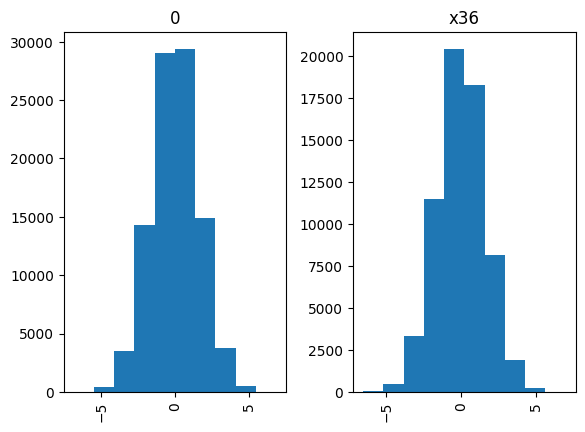

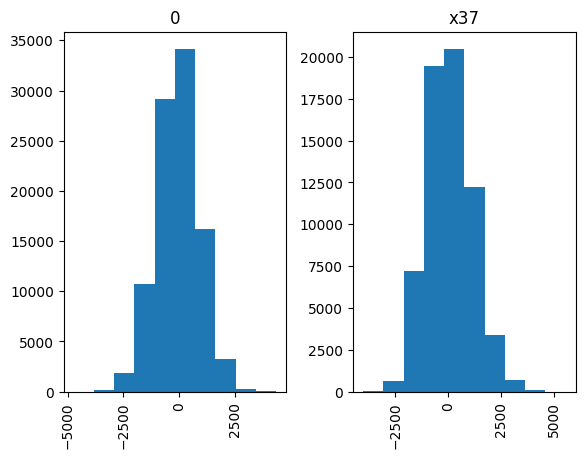

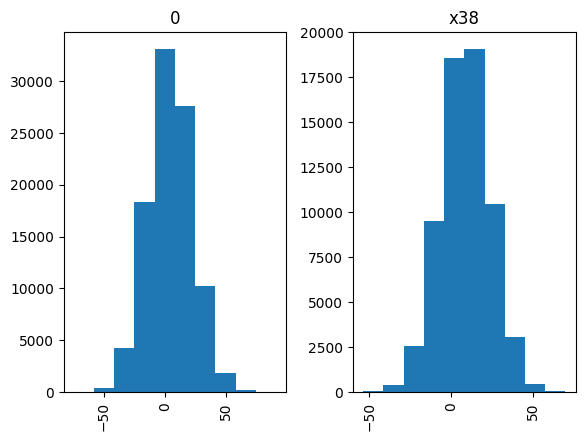

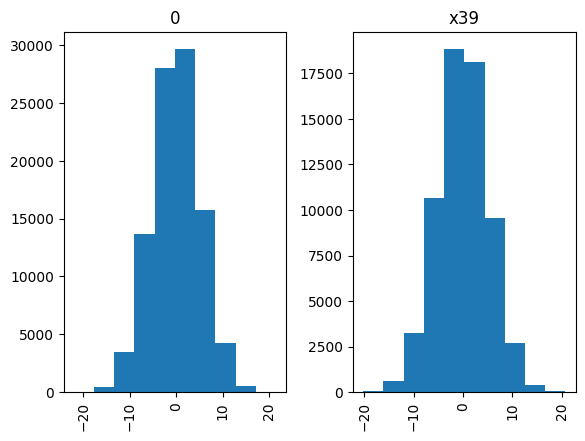

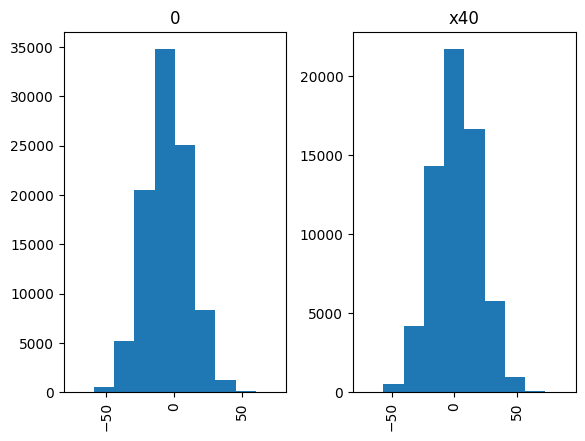

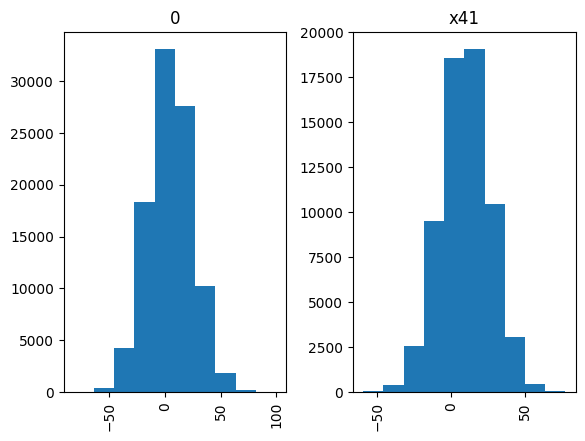

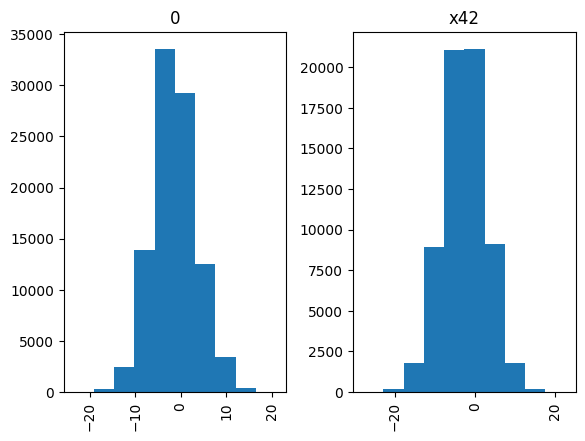

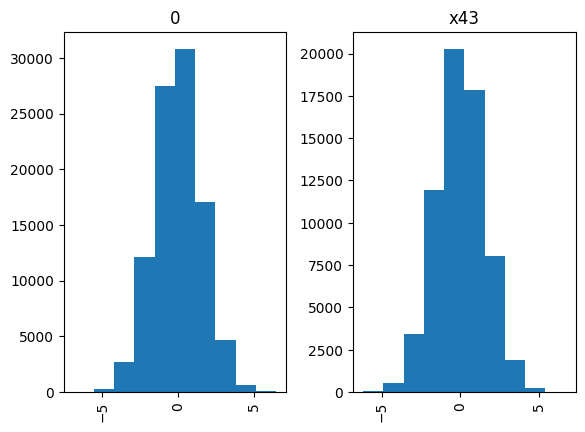

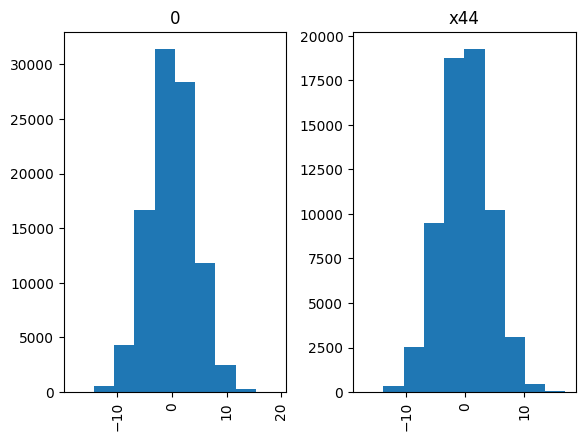

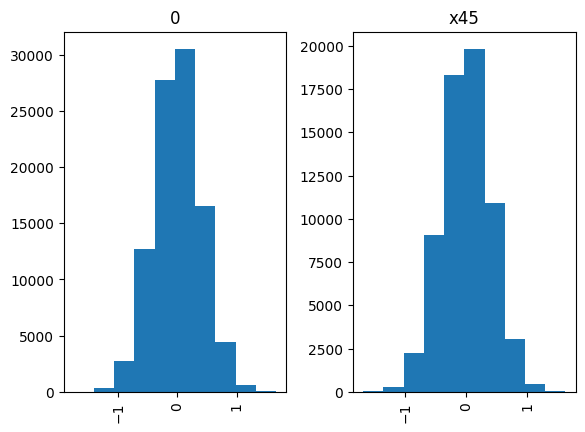

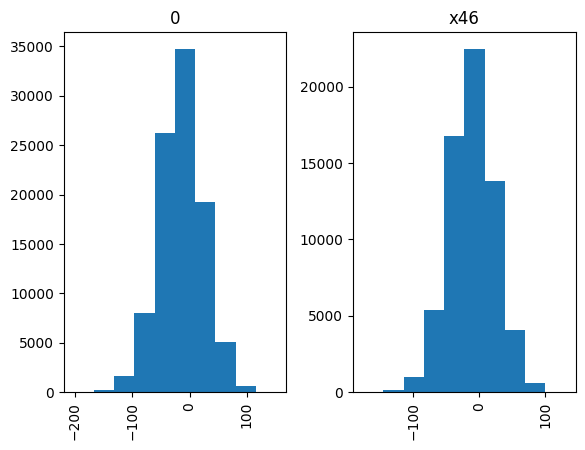

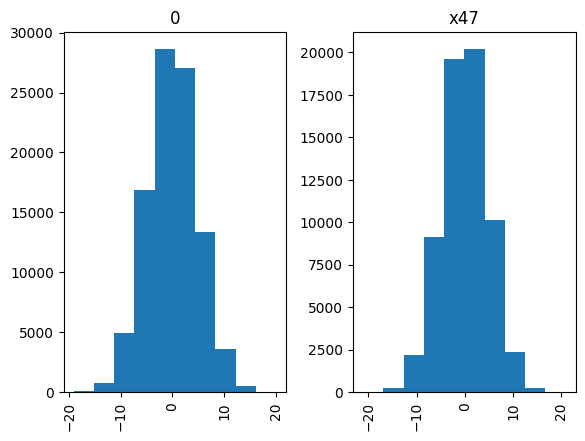

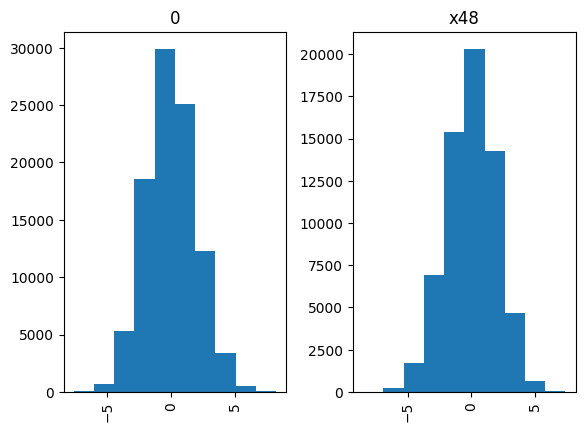

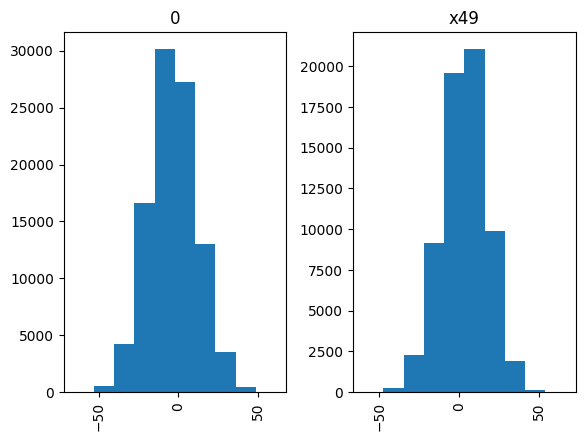

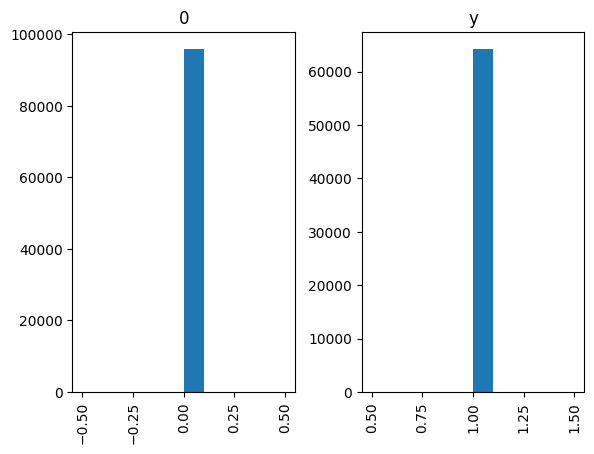

In [27]:
for i in df:
    df.hist(column=i,by='y' )
    plt.title(i)
    plt.show()

In [28]:
# How many of each class is in
df['y'].value_counts()

0    95803
1    64197
Name: y, dtype: int64

In [29]:
df_OHC = df

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
# create a list of categorical feature column names
cat_cols = ['x24', 'x29', 'x30']

# create a OneHotEncoder object
encoder = OneHotEncoder()

# encode each categorical feature independently
for col in cat_cols:
    # fit and transform the data for the current feature column
    encoded = encoder.fit_transform(df_OHC[col].values.reshape(-1,1))
    # create column names for the encoded features
    enc_colnames = [col + '' + str(cat) for cat in encoder.categories_[0]]
    # create a dataframe from the encoded features and append it to the original dataframe
    enc_df = pd.DataFrame(encoded.toarray(), columns=enc_colnames)
    enc_df = enc_df.astype('uint8') 
    df_OHC = pd.concat([df_OHC, enc_df], axis=1)

In [32]:
df_OHC = df_OHC.drop(cat_cols, axis=1)
df_OHC

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29None,x29Nov,x29Oct,x29sept.,x30None,x30friday,x30monday,x30thurday,x30tuesday,x30wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0,0,0,0,0,0,0,0,1,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0,0,0,0,0,0,0,0,0,1
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0,0,0,0,0,0,0,0,0,1
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0,0,0,0,0,0,0,0,0,1
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,...,0,0,0,0,0,0,0,0,0,1
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,...,0,0,0,0,0,0,0,0,0,1
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,...,0,0,0,0,0,0,0,0,0,1
159998,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,7.805271,-10.233054,2.609986,4.251127,...,0,0,0,0,0,0,0,0,0,1


In [33]:
df_OHC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 71 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   x0            160000 non-null  float64 
 1   x1            160000 non-null  float64 
 2   x2            160000 non-null  float64 
 3   x3            160000 non-null  float64 
 4   x4            160000 non-null  float64 
 5   x5            160000 non-null  float64 
 6   x6            160000 non-null  float64 
 7   x7            160000 non-null  float64 
 8   x8            160000 non-null  float64 
 9   x9            160000 non-null  float64 
 10  x10           160000 non-null  float64 
 11  x11           160000 non-null  float64 
 12  x12           160000 non-null  float64 
 13  x13           160000 non-null  float64 
 14  x14           160000 non-null  float64 
 15  x15           160000 non-null  float64 
 16  x16           160000 non-null  float64 
 17  x17           160000 non-null

In [34]:
df_nocat = df.drop(cat_cols, axis=1)
df_nocat

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,...,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858,1
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,...,12.803189,0.841446,-0.682177,-5.047677,-0.017898,0.780130,6.387266,-1.374742,-1.623952,0
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,...,-0.346570,-0.144098,0.738298,7.241041,0.215347,-12.155249,3.265263,1.230963,3.335471,1
159998,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,7.805271,-10.233054,2.609986,4.251127,...,-0.307656,-0.601145,-3.443112,0.549931,0.206728,5.081980,1.701462,-0.279619,-1.986424,0


#### Model 1 - Random Forest

In [35]:
#Split of the features and target variable
scaler = StandardScaler()

#All the rows and columns minus the target variable
x_feat = scaler.fit_transform(df_nocat.drop('y', axis=1))



#Target Variable
y_target = df_nocat['y']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_feat,y_target,test_size=0.2, random_state = 25)

print(f"No. of X training examples: {X_train.shape[0]}")
print(f"No. of X testing examples: {X_test.shape[0]}")
print(f"No. of Y training examples: {y_train.shape[0]}")
print(f"No. of Y testing examples: {y_test.shape[0]}")

No. of X training examples: 128000
No. of X testing examples: 32000
No. of Y training examples: 128000
No. of Y testing examples: 32000


In [37]:
# load random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [38]:
# not sure when to use this
# Create Cross Validation Procedure
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=888, shuffle=True)

In [48]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [49]:
cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc')

array([0.97282236, 0.97376447, 0.97248852, 0.97438599, 0.9731378 ])

In [50]:
# baseline score for RF
np.mean(cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc'))

0.973480637158687

In [51]:
rf.feature_importances_

array([0.00777701, 0.00764718, 0.02957286, 0.00776783, 0.00774315,
       0.00773348, 0.02958585, 0.03973269, 0.00788134, 0.00768203,
       0.00765362, 0.0076762 , 0.05022946, 0.007798  , 0.00776032,
       0.00772412, 0.00776347, 0.00760669, 0.00772795, 0.00772453,
       0.06364328, 0.00779395, 0.00771025, 0.07350984, 0.00774469,
       0.00772075, 0.04633294, 0.04662131, 0.00756038, 0.02686769,
       0.00777495, 0.0077634 , 0.00783397, 0.00776232, 0.04498507,
       0.03575962, 0.00789308, 0.0430578 , 0.03396015, 0.04995884,
       0.00772023, 0.00776243, 0.00767231, 0.03900451, 0.00762687,
       0.05882881, 0.05634278])

In [53]:
lowest_features = ['x0', 'x1', 'x3', 'x4', 'x5', 'x8', 'x9', 'x10',
                   'x11', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
                   'x21', 'x22', 'x25', 'x26', 'x31', 'x33', 'x34', 'x35',
                   'x36',  'x39', 'x43', 'x44', 'x45', 'x47'  ]

df_highfeat = df_nocat.drop(lowest_features, axis=1)
df_highfeat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   x2      160000 non-null  float64 
 1   x6      160000 non-null  float64 
 2   x7      160000 non-null  float64 
 3   x12     160000 non-null  float64 
 4   x20     160000 non-null  float64 
 5   x23     160000 non-null  float64 
 6   x27     160000 non-null  float64 
 7   x28     160000 non-null  float64 
 8   x32     160000 non-null  float64 
 9   x37     160000 non-null  float64 
 10  x38     160000 non-null  float64 
 11  x40     160000 non-null  float64 
 12  x41     160000 non-null  float64 
 13  x42     160000 non-null  float64 
 14  x46     160000 non-null  float64 
 15  x48     160000 non-null  float64 
 16  x49     160000 non-null  float64 
 17  y       160000 non-null  category
dtypes: category(1), float64(17)
memory usage: 20.9 MB


In [54]:
#Split of the features and target variable
scaler = StandardScaler()

#All the rows and columns minus the target variable
x_feat = scaler.fit_transform(df_highfeat.drop('y', axis=1))



#Target Variable
y_target = df_highfeat['y']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_feat,y_target,test_size=0.2, random_state = 25)

print(f"No. of X training examples: {X_train.shape[0]}")
print(f"No. of X testing examples: {X_test.shape[0]}")
print(f"No. of Y training examples: {y_train.shape[0]}")
print(f"No. of Y testing examples: {y_test.shape[0]}")

No. of X training examples: 128000
No. of X testing examples: 32000
No. of Y training examples: 128000
No. of Y testing examples: 32000


In [56]:
# load random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [57]:
# not sure when to use this
# Create Cross Validation Procedure
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=888, shuffle=True)

In [58]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [59]:
cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc')

array([0.98065136, 0.98194959, 0.98046646, 0.98235017, 0.98048708])

In [60]:
# baseline score for RF
np.mean(cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc'))

0.9811127775491777

In [64]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [65]:
# define parameters for tuning
max_depth_RF = [None, 18, 23, 32]
criterion_RF = ['gini', 'entropy']
min_samples_leaf_RF = [1, 2, 5]
min_samples_split_RF = [2, 4, 10]
max_features_RF = ['sqrt', 'log2', None, 5, 6, 7]



# define grid search
tuned_parameters = {
    'n_estimators': [100],
    'max_depth': max_depth_RF,
    'criterion': criterion_RF,
    'min_samples_leaf': min_samples_leaf_RF,
    'min_samples_split': min_samples_split_RF,
    'max_features': max_features_RF
}

scores = ['roc_auc', 'precision', 'recall', 'accuracy']

In [66]:
# find best tuning parameters

for score in scores:
    print("# tunning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(RandomForestClassifier(),
                             tuned_parameters,
                             cv=cv,
                             scoring='%s' % score,
                             random_state=None,
                             n_jobs=-1,
                             n_iter=50)

    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on develpoment set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classifcation report:")
    print()
    print("The model is trained on the ful development set.")
    print("The scores are computed on the ful evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    df_params = pd.DataFrame.from_dict(clf.cv_results_['params'])
    df_scores = pd.DataFrame.from_dict(clf.cv_results_['mean_test_score'])
    df_scores = df_scores.rename(columns={0: "scores"})
    df_results = pd.concat([df_params, df_scores], axis=1)
    df_results.to_csv("RF_scores_%s.csv" % score)

# tunning hyper-parameters for roc_auc

Best parameters set found on development set:

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 32, 'criterion': 'entropy'}

Grid scores on develpoment set:

0.982 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 32, 'criterion': 'entropy'}
0.980 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 6, 'max_depth': None, 'criterion': 'gini'}
0.982 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 5, 'max_depth': 32, 'criterion': 'entropy'}
0.980 (+/-0.001) for {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 7, 'max_depth': 18, 'criterion': 'entropy'}
0.980 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': None, 'criterion': 'gi

Best parameters set found on development set:

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': None, 'criterion': 'gini'}

Grid scores on develpoment set:

0.939 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 32, 'criterion': 'entropy'}
0.938 (+/-0.004) for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': None, 'criterion': 'gini'}
0.937 (+/-0.005) for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 23, 'criterion': 'gini'}
0.939 (+/-0.003) for {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 5, 'max_depth': None, 'criterion': 'entropy'}
0.938 (+/-0.004) for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 32, 'criterion': 'entropy'}
0.936 (+/-0.003) for {'n_estimators

Best parameters set found on development set:

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 23, 'criterion': 'entropy'}

Grid scores on develpoment set:

0.903 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': None, 'criterion': 'gini'}
0.902 (+/-0.005) for {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
0.905 (+/-0.004) for {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': None, 'criterion': 'gini'}
0.900 (+/-0.003) for {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 18, 'criterion': 'entropy'}
0.902 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 23, 'criterion': 'entropy'}
0.897 (+/-0.003) for {'n_e

Best parameters set found on development set:

{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 23, 'criterion': 'entropy'}

Grid scores on develpoment set:

0.934 (+/-0.003) for {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 7, 'max_depth': 32, 'criterion': 'gini'}
0.938 (+/-0.003) for {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 23, 'criterion': 'gini'}
0.938 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 18, 'criterion': 'entropy'}
0.939 (+/-0.002) for {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 32, 'criterion': 'entropy'}
0.936 (+/-0.003) for {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 18, 'criterion': 'gini'}
0.938 (+/-0.002) for {'n_estimators': 100, '

In [111]:
# Set Best RF Classifier - based on ROC_AUC

params = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1,
          'max_features': 5, 'max_depth': 32, 'criterion': 'entropy'}

clf = RandomForestClassifier(random_state=None,
                             n_jobs=-1,
                             n_estimators=100,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features=5,
                             max_depth=32,
                             criterion='entropy')

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     19219
           1       0.94      0.91      0.92     12781

    accuracy                           0.94     32000
   macro avg       0.94      0.94      0.94     32000
weighted avg       0.94      0.94      0.94     32000



In [112]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred)*100.0))
print("Recall: %.2f%%" % (recall_score(y_test, y_pred)*100.0))
print("ROC_AUC: %.2f%%" % (roc_auc_score(y_test, y_pred)*100.0))

Accuracy: 94.08%
Precision: 94.09%
Recall: 90.89%
ROC_AUC: 93.55%


In [113]:
cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

array([0.98149835, 0.98307434, 0.98140759, 0.98321028, 0.98129952])

In [114]:
np.mean(cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc'))

0.9820993833845962

In [115]:
from sklearn.metrics import confusion_matrix

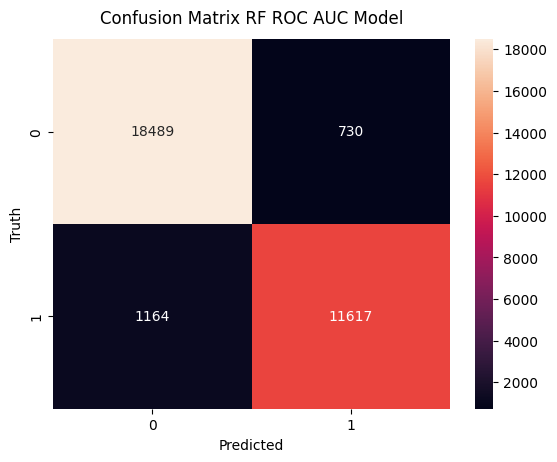

In [116]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix RF ROC AUC Model", y=1.02);

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     95803
           1       0.99      0.98      0.99     64197

    accuracy                           0.99    160000
   macro avg       0.99      0.99      0.99    160000
weighted avg       0.99      0.99      0.99    160000



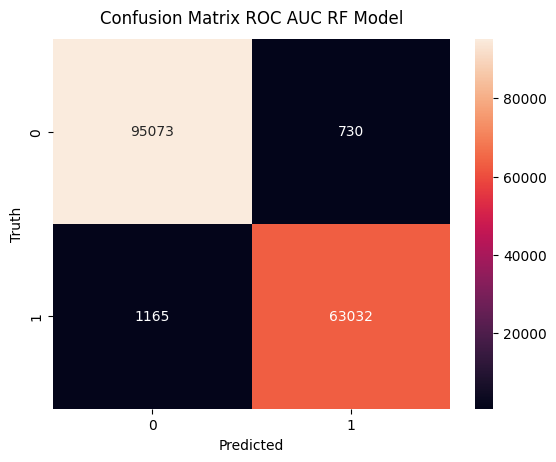

In [117]:
y_full_pred = clf.predict(x_feat)
cnf_matrix = confusion_matrix(y_target,y_full_pred)
print(classification_report(y_target,y_full_pred))

sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix ROC AUC RF Model", y=1.02);

In [140]:
total_cost = 1165*15 + 730*35
print("total cost for this model is : $",total_cost)

total cost for this model is : $ 43025


##### Precision based RF

In [119]:
# Set Best RF Classifier - based on Precision

params = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1,
          'max_features': 6, 'max_depth': None, 'criterion': 'gini'}

clf = RandomForestClassifier(random_state=None,
                             n_jobs=-1,
                             n_estimators=100,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features=6,
                             max_depth=None,
                             criterion='gini')

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     19219
           1       0.94      0.91      0.92     12781

    accuracy                           0.94     32000
   macro avg       0.94      0.93      0.94     32000
weighted avg       0.94      0.94      0.94     32000



In [120]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred)*100.0))
print("Recall: %.2f%%" % (recall_score(y_test, y_pred)*100.0))
print("ROC_AUC: %.2f%%" % (roc_auc_score(y_test, y_pred)*100.0))

Accuracy: 93.95%
Precision: 94.08%
Recall: 90.56%
ROC_AUC: 93.39%


In [121]:
cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

array([0.98035018, 0.98193004, 0.98051443, 0.9822622 , 0.98024043])

In [122]:
np.mean(cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc'))

0.9812390235929878

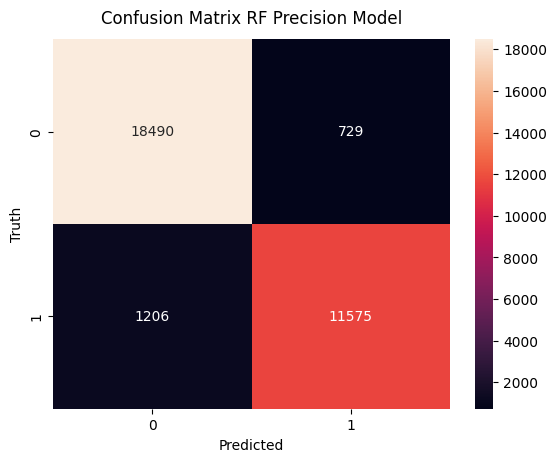

In [123]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix RF Precision Model", y=1.02);

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     95803
           1       0.99      0.98      0.98     64197

    accuracy                           0.99    160000
   macro avg       0.99      0.99      0.99    160000
weighted avg       0.99      0.99      0.99    160000



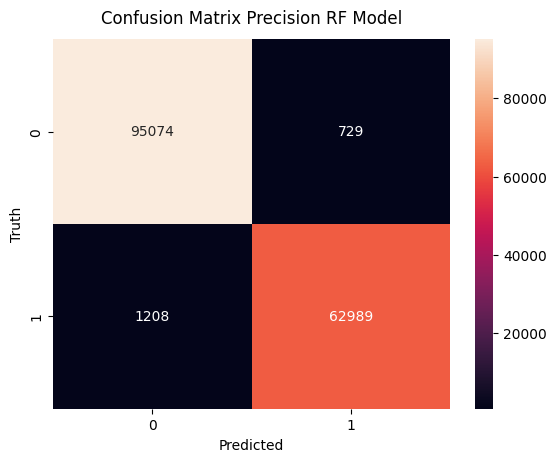

In [124]:
y_full_pred = clf.predict(x_feat)
cnf_matrix = confusion_matrix(y_target,y_full_pred)
print(classification_report(y_target,y_full_pred))

sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix Precision RF Model", y=1.02);

In [141]:
total_cost = 1208*15 + 729*35
print("total cost for this model is : $",total_cost)

total cost for this model is : $ 43635


##### Recall based RF

In [126]:
# Set Best RF Classifier for Recall

params = {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1,
          'max_features': 5, 'max_depth': 23, 'criterion': 'entropy'}

clf = RandomForestClassifier(random_state=None,
                             n_jobs=-1,
                             n_estimators=100,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_features=5,
                             max_depth=23,
                             criterion='entropy')

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     19219
           1       0.94      0.91      0.92     12781

    accuracy                           0.94     32000
   macro avg       0.94      0.94      0.94     32000
weighted avg       0.94      0.94      0.94     32000



In [127]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred)*100.0))
print("Recall: %.2f%%" % (recall_score(y_test, y_pred)*100.0))
print("ROC_AUC: %.2f%%" % (roc_auc_score(y_test, y_pred)*100.0))

Accuracy: 94.07%
Precision: 94.00%
Recall: 90.96%
ROC_AUC: 93.55%


In [128]:
cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

array([0.98149611, 0.98314036, 0.98134289, 0.98334994, 0.9809945 ])

In [129]:
np.mean(cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc'))

0.981937181599703

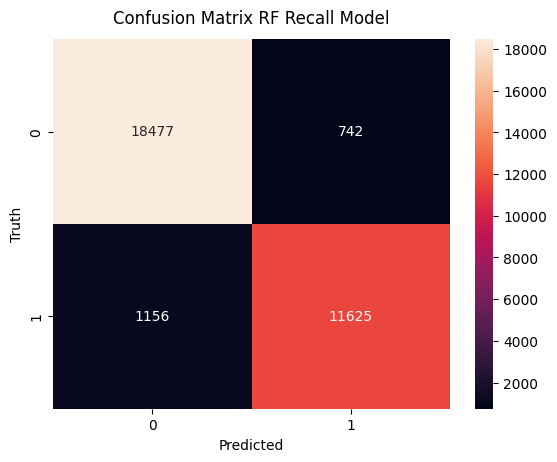

In [130]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix RF Recall Model", y=1.02);

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     95803
           1       0.99      0.98      0.99     64197

    accuracy                           0.99    160000
   macro avg       0.99      0.99      0.99    160000
weighted avg       0.99      0.99      0.99    160000



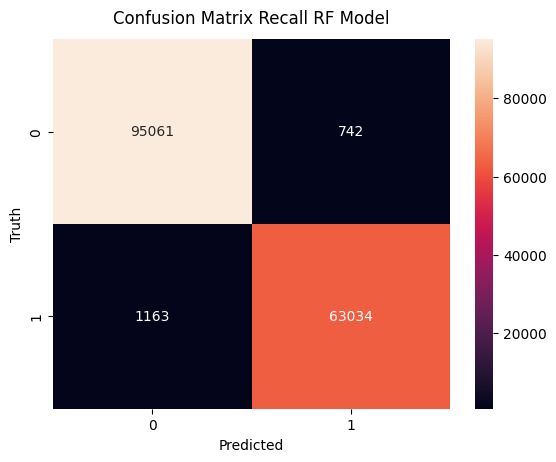

In [131]:
y_full_pred = clf.predict(x_feat)
cnf_matrix = confusion_matrix(y_target,y_full_pred)
print(classification_report(y_target,y_full_pred))

sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix Recall RF Model", y=1.02);

In [142]:
total_cost = 1163*15 + 742*35
print("total cost for this model is : $",total_cost)

total cost for this model is : $ 43415


##### Accuracy based RF

In [133]:
# Set Best RF Classifier for Accuracy

params = {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 1,
          'max_features': 7, 'max_depth': 23, 'criterion': 'entropy'}

clf = RandomForestClassifier(random_state=None,
                             n_jobs=-1,
                             n_estimators=100,
                             min_samples_split=4,
                             min_samples_leaf=1,
                             max_features=7,
                             max_depth=23,
                             criterion='entropy')

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     19219
           1       0.94      0.91      0.93     12781

    accuracy                           0.94     32000
   macro avg       0.94      0.94      0.94     32000
weighted avg       0.94      0.94      0.94     32000



In [134]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100.0))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred)*100.0))
print("Recall: %.2f%%" % (recall_score(y_test, y_pred)*100.0))
print("ROC_AUC: %.2f%%" % (roc_auc_score(y_test, y_pred)*100.0))

Accuracy: 94.13%
Precision: 94.06%
Recall: 91.06%
ROC_AUC: 93.62%


In [135]:
cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

array([0.98130318, 0.98289413, 0.98151557, 0.9830627 , 0.98090822])

In [136]:
np.mean(cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc'))

0.982135487130939

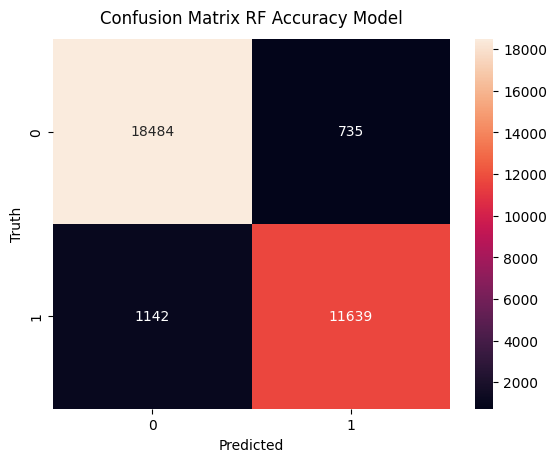

In [137]:
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix RF Accuracy Model", y=1.02);

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     95803
           1       0.99      0.98      0.99     64197

    accuracy                           0.99    160000
   macro avg       0.99      0.99      0.99    160000
weighted avg       0.99      0.99      0.99    160000



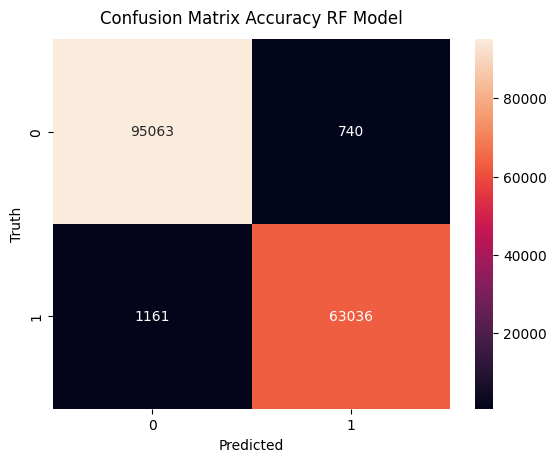

In [138]:
y_full_pred = clf.predict(x_feat)
cnf_matrix = confusion_matrix(y_target,y_full_pred)
print(classification_report(y_target,y_full_pred))

sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix Accuracy RF Model", y=1.02);

In [143]:
total_cost = 1161*15 + 740*35
print("total cost for this model is : $",total_cost)

total cost for this model is : $ 43315


#### Model 2 - Neural Network